# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    city_url
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()    
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camana
Processing Record 2 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | kenora
Processing Record 7 of Set 1 | zhezqazghan
Processing Record 8 of Set 1 | porto novo
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | buala
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | kayenta
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | kerikeri
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | heyuan
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | santana
Processi

Processing Record 42 of Set 4 | puerto lempira
Processing Record 43 of Set 4 | pskov
Processing Record 44 of Set 4 | port blair
Processing Record 45 of Set 4 | dalandzadgad
Processing Record 46 of Set 4 | namtsy
Processing Record 47 of Set 4 | cherdyn'
Processing Record 48 of Set 4 | sosnovo-ozerskoye
Processing Record 49 of Set 4 | razole
Processing Record 0 of Set 5 | kyain seikgyi township
City not found. Skipping...
Processing Record 1 of Set 5 | salahonda
Processing Record 2 of Set 5 | santa vitoria do palmar
Processing Record 3 of Set 5 | beaufort
Processing Record 4 of Set 5 | dapa
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | vinita
Processing Record 7 of Set 5 | oltinko'l
Processing Record 8 of Set 5 | long beach
Processing Record 9 of Set 5 | ust-tsilma
Processing Record 10 of Set 5 | mezica
Processing Record 11 of Set 5 | kingaroy
Processing Record 12 of Set 5 | petropavlovsk-kamchatsky
Processing Record 13 of Set 5 | sur
Processing Record 14 of Set 5 |

Processing Record 31 of Set 8 | talcahuano
Processing Record 32 of Set 8 | hadithah
Processing Record 33 of Set 8 | howrah
Processing Record 34 of Set 8 | arkhangel'sk
Processing Record 35 of Set 8 | hayma'
City not found. Skipping...
Processing Record 36 of Set 8 | tres arroyos
Processing Record 37 of Set 8 | jamai
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | kirensk
Processing Record 40 of Set 8 | tallkayf
Processing Record 41 of Set 8 | colonia
Processing Record 42 of Set 8 | geiro
Processing Record 43 of Set 8 | traralgon
Processing Record 44 of Set 8 | pong nam ron
Processing Record 45 of Set 8 | batang
Processing Record 46 of Set 8 | dul'durga
Processing Record 47 of Set 8 | pochaiv
Processing Record 48 of Set 8 | chipinge
Processing Record 49 of Set 8 | odacho-oda
Processing Record 0 of Set 9 | ugoofaaru
Processing Record 1 of Set 9 | tchintabaraden
Processing Record 2 of Set 9 | watsa
Processing Record 3 of Set 9 | igarka
Processing Record 4 of Set 9

Processing Record 19 of Set 12 | bargara
City not found. Skipping...
Processing Record 20 of Set 12 | argostolion
Processing Record 21 of Set 12 | afif
Processing Record 22 of Set 12 | shendi
Processing Record 23 of Set 12 | monze
Processing Record 24 of Set 12 | griffith
Processing Record 25 of Set 12 | balabac
Processing Record 26 of Set 12 | shimanovsk
Processing Record 27 of Set 12 | toga village
City not found. Skipping...
Processing Record 28 of Set 12 | pitimbu
Processing Record 29 of Set 12 | shakawe
Processing Record 30 of Set 12 | dila
Processing Record 31 of Set 12 | bengkulu
Processing Record 32 of Set 12 | lethbridge
Processing Record 33 of Set 12 | algyo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,camana,-16.6228,-72.7111,16.92,83,79,3.16,PE,1688771832
1,wailua homesteads,22.0669,-159.3780,29.44,70,20,7.72,US,1688771833
2,adamstown,-25.0660,-130.1015,21.70,68,18,6.57,PN,1688771703
3,west island,-12.1568,96.8225,25.99,73,40,6.69,CC,1688771833
4,kenora,49.8167,-94.4337,20.43,40,61,2.68,CA,1688771833


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camana,-16.6228,-72.7111,16.92,83,79,3.16,PE,1688771832
1,wailua homesteads,22.0669,-159.3780,29.44,70,20,7.72,US,1688771833
2,adamstown,-25.0660,-130.1015,21.70,68,18,6.57,PN,1688771703
3,west island,-12.1568,96.8225,25.99,73,40,6.69,CC,1688771833
4,kenora,49.8167,-94.4337,20.43,40,61,2.68,CA,1688771833


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

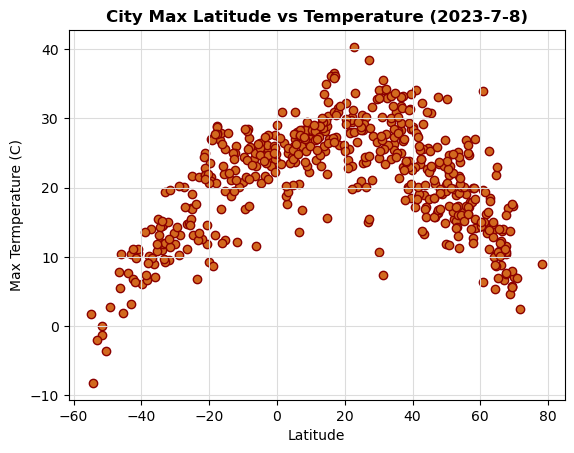

In [43]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "darkred", color = "chocolate", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2023-7-8)", weight = "bold")
plt.ylabel("Max Termperature (C)")
plt.xlabel("Latitude")
plt.grid(True, color = "gainsboro")

# Save the figure
#plt.savefig("output_data/MWalton_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

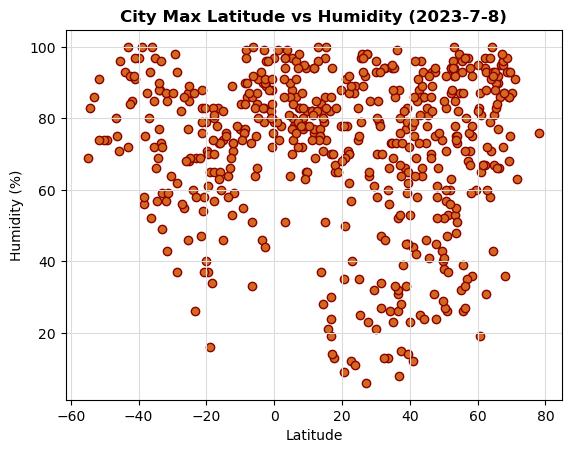

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "darkred", color = "chocolate", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2023-7-8)", weight = "bold")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True, color = "gainsboro")

# Save the figure
#plt.savefig("output_data/MWalton_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

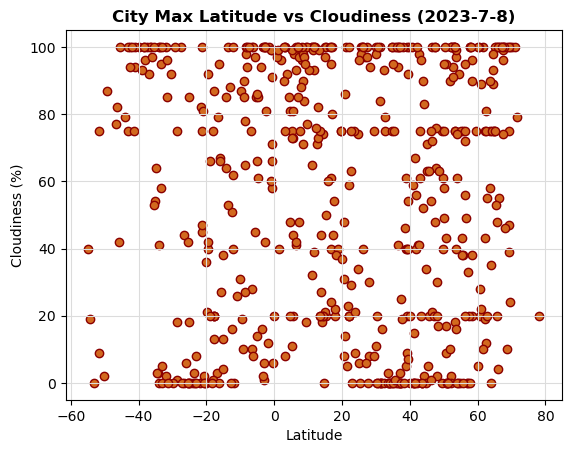

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "darkred", color = "chocolate", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness (2023-7-8)", weight = "bold")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True, color = "gainsboro")

# Save the figure
#plt.savefig("output_data/MWalton_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

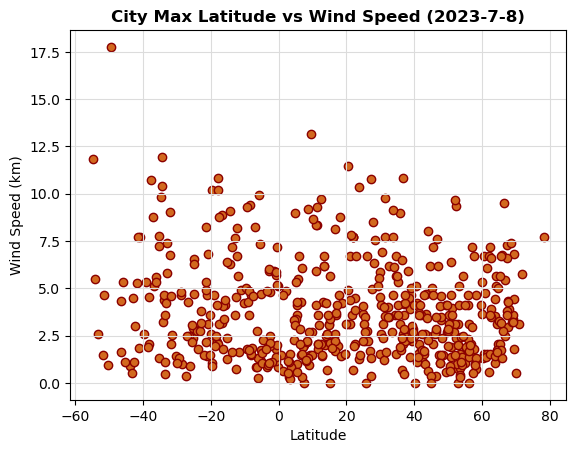

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "darkred", color = "chocolate", marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed (2023-7-8)", weight = "bold")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True, color = "gainsboro")

# Save the figure
#plt.savefig("output_data/MWalton_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
# Latitude vs. Temperature, Humidity, Cloudiness, Wind Speed
x_val_Lat = city_data_df["Lat"].astype("float")
   
# Latitude vs. Temperature
y_val_Temp = city_data_df["Max Temp"].astype("float")
LR_Temp = (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_Lat, y_val_Temp)
LR_Temp_regress_val = x_val_Lat * slope + intercept
LR_Temp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Latitude vs. Humidity
y_val_Humid = city_data_df["Humidity"].astype("float")
LR_Humid = (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_Lat, y_val_Humid)
LR_Humid_regress_val = x_val_Lat * slope + intercept
LR_Humid_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Latitude vs. Cloudiness
y_val_Cloud = city_data_df["Cloudiness"].astype("float")
LR_Cloud = (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_Lat, y_val_Cloud)
LR_Cloud_regress_val = x_val_Lat * slope + intercept
LR_Cloud_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Latitude vs. Wind Speed
y_val_WindSp = city_data_df["Wind Speed"].astype("float")
LR_WindSp = (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_Lat, y_val_WindSp)
LR_WindSp_regress_val = x_val_Lat * slope + intercept
LR_WindSp_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0) = AskBCS assistance to clarify approach
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,29.44,70,20,7.72,US,1688771833
4,kenora,49.8167,-94.4337,20.43,40,61,2.68,CA,1688771833
5,zhezqazghan,47.7833,67.7667,23.40,45,64,4.61,KZ,1688771834
6,porto novo,6.4965,2.6036,26.90,86,100,4.27,BJ,1688771596
8,sitka,57.0531,-135.3300,17.94,68,0,7.20,US,1688771834


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0) = AskBCS assistance to clarify approach
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,camana,-16.6228,-72.7111,16.92,83,79,3.16,PE,1688771832
2,adamstown,-25.0660,-130.1015,21.70,68,18,6.57,PN,1688771703
3,west island,-12.1568,96.8225,25.99,73,40,6.69,CC,1688771833
7,arraial do cabo,-22.9661,-42.0278,21.54,69,8,3.80,BR,1688771711
9,buala,-8.1450,159.5921,27.09,86,94,4.64,SB,1688771835


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE